## Ejemplo de reduccion de ruido en una señal
Generaremos una señal conocida y le agregaremos ruido. Luego calcularemos su FFT y reconstruiremos la señal a partir de las frecuencias dominantes.

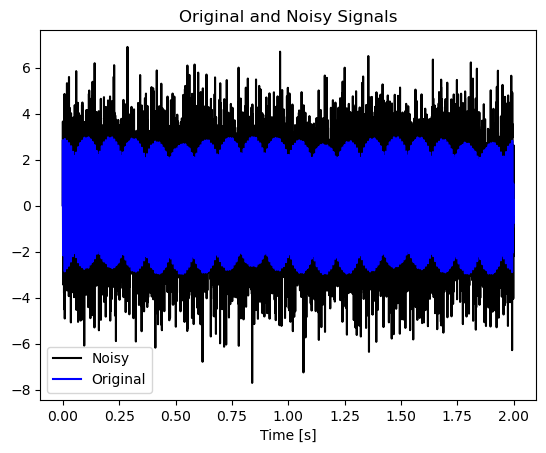

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from IPython.display import Audio

rate = 8000
dt = 1/rate
t = np.arange(0, 2, dt)
n = len(t)
f_original = np.sin(2 * np.pi * 440 * t) + np.sin(2 * np.pi * 554.365 * t) + np.sin(2 * np.pi * 659.255 * t) # A4, C#5, E5
f_noisy = f_original + 1.5 * np.random.randn(len(t))
plt.plot(t, f_noisy, 'k',label='Noisy')
plt.plot(t, f_original, 'b',label='Original')
plt.legend()
plt.xlabel('Time [s]')
plt.title('Original and Noisy Signals')
display(Audio(f_original, rate=rate))  # WARNING: OJOOOO CON EL VOLUMEEEEN
display(Audio(f_noisy, rate=rate))  # WARNING: OJOOOO CON EL VOLUMEEEEN

Text(0.5, 1.0, 'Power Spectral Density of Noisy Signal')

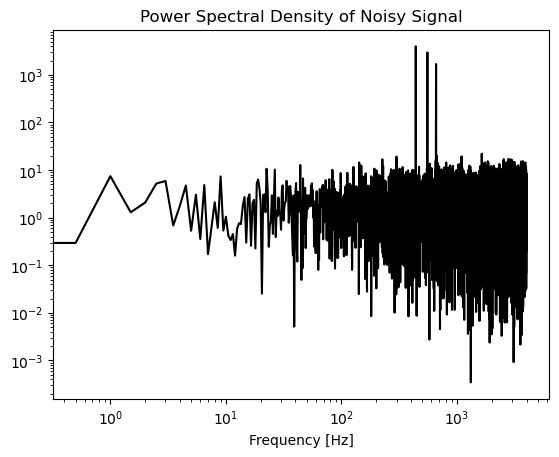

In [117]:
# FFT
f_hat = np.fft.fft(f_noisy, n=n)
PotenciaEspectral = np.abs(f_hat)**2 / n
freqs = np.fft.fftfreq(n, dt)
plt.loglog(freqs[:n//2], PotenciaEspectral[:n//2], 'k')
plt.xlabel('Frequency [Hz]')
plt.title('Power Spectral Density of Noisy Signal')

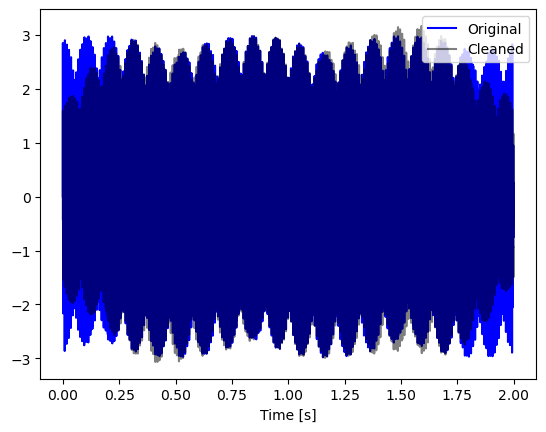

In [118]:
threshold = 100
indices = PotenciaEspectral > threshold
f_hat_clean = f_hat * indices
f_clean = np.fft.ifft(f_hat_clean)
plt.plot(t, f_original, 'b',label='Original')
plt.plot(t, f_clean.real, 'k',label='Cleaned',alpha=0.5)
plt.legend()
plt.xlabel('Time [s]')
Audio(f_clean.real, rate=rate)  # WARNING: OJOOOO CON EL VOLUMEEEEN

Me sorprende lo bien que filtra el ruido, me queda la duda de como elegir el umbral, yo elegi este de forma arbitraria. Se me ocurrio que quizas podria quedarme con las frecuencias que sumen un $X\%$ de la potencia total, pero no lo probe.